# Matplotlib
Credits: **Ian Allison (Compute Canada, 2020)**
with some additions and changes for Geo Machine Learning course GOPH699)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/MatplotlibIntroSolved.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#from cycler import cycler
plt.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

## Visualization

Visualization is a huge topic, but we are going to cover only some basics. We'll be using a system called [matplotlib](https://matplotlib.org/) that is fairly flexible and very widely used. 

### Matplotlib

Matplotlib is the defacto standard for visualization in python. It has been around for a long time, and it benefits from a large userbase, good documentation, [tutorials](https://matplotlib.org/tutorials/index.html) and lots of easily copied examples!

Matplotlib is a module like everything else, and because it is so widely used there's a standard import invocation. `matplotlib.pyplot` or `plt` is the state-based interface to matplotlib. If you've ever plotted in MATLAB it should be fairly familiar (actually, that's where the MAT in matplotlib comes from). 

Matplotlib is portable across systems. For this to work it uses the concept of "backends" which do the actual rendering of figures. These backends vary by operating system and other factors and all you need to do is tell matplotlib which one you would like to use. For the notebook interface there is a special magic command calld `%matplotlib` which will do this for us. Most backends are hooks into specific windowing libraries or other utilities, but `inline` is a special backend which lets you display the results directly in the notebook.

If you forget to specify the backend, matplotlib won't complain, but your output will be missing (matplotlib will return an object but it won't render anything). One interesting alternative to `inline` is `notebook` (or `ipympl`) which is supposed to deliver an amount of interactivity (zoom, resize etc.) but it depends on a quick kernel connection so sometimes it can be pretty slow. `inline` is normally enough for quick explorations. For more interactivity take a look at the following projects
 
  * [altair](https://altair-viz.github.io/)
  * [plotly](https://plot.ly/python/ipython-notebook-tutorial/)
  * [d3](https://d3js.org/)
  
Matplotlib actually has two interfaces for plotting, one is a more traditional stateful interface and the other takes an object oriented approach. The second one is a little bit more verbose but more flexible and widely used. If you are looking at examples, you can normally tell which one they are using by checking to see if the call `plt.plot` or `ax.plot`. The OO interface gives you explicit figure and axes objects to attach things to so it doesn't depend as strongly on current cell context (this is useful if you want to modify more than one plot)

### Basic Plotting

We'll start with a line plot.

([<matplotlib.lines.Line2D at 0x7f7f37fb8b80>], Text(0.5, 0, 'index'))

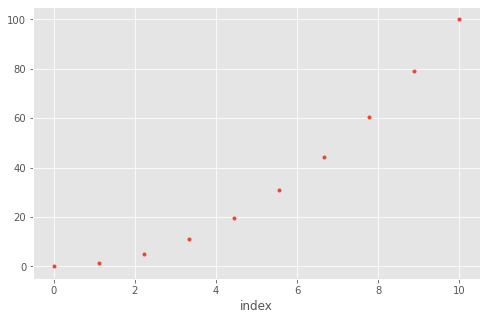

In [2]:
fig=plt.figure()
x=np.linspace(0,10,10)
y=np.square(x)
plt.plot(x,y,'.'),plt.xlabel('index')

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


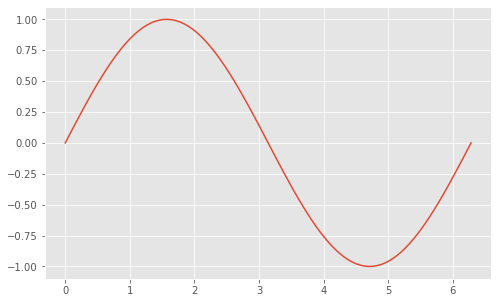

In [3]:
x = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))
print(type(fig),type(ax))

The first line is just giving us some numbers to plot. The second line calls the subplots function with an argument of 1. If you look at the documentation for that function, it says that this should give is a single figure (canvas) and one set of axes. Later on, we will add other values to make more complicated plots.

Within a single axes object we can plot multiple things, this will overlay the plots

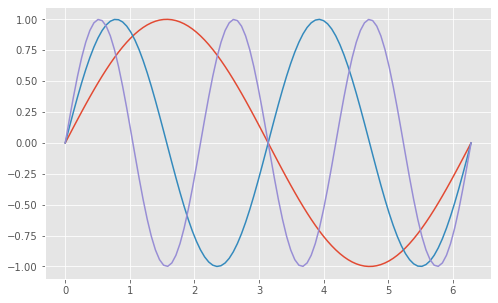

In [4]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(3*x))

`plot` takes a huge selection of [keyword arguments](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). We can change line widths, colors, types, add  labels etc.

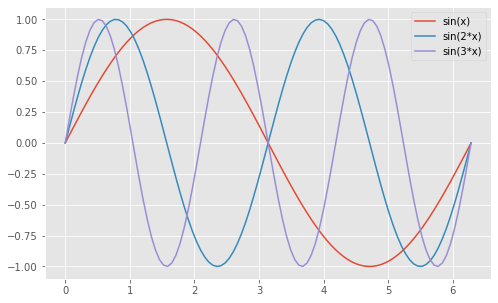

In [5]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot with `label=` for each and add a lagend to the axis
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.sin(2*x), label='sin(2*x)')
ax.plot(x, np.sin(3*x), label='sin(3*x)')
ax.legend();

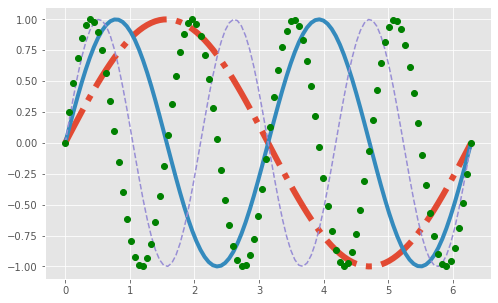

In [6]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same figure with labels and different `linetype` and `linewidth` values
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), label='sin(x)', linewidth=6, linestyle='-.')
ax.plot(x, np.sin(2*x), label='sin(2x)', linewidth=4)
ax.plot(x, np.sin(3*x), label='sin(3x)', linestyle='--')
ax.plot(x, np.sin(4*x), 'go',label='sin(x)',linewidth=6)


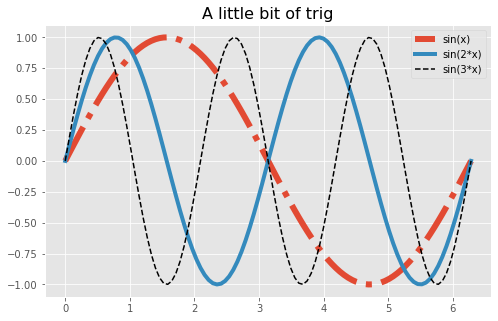

In [7]:
# Same plot, but set a title on the axis, use the fontdict to change the fontsize
# fontdict={'fontsize': 16}
fig, ax = plt.subplots(1)
ax.set_title('A little bit of trig', fontdict={'fontsize': 16})
ax.plot(x, np.sin(x), label='sin(x)', linewidth=6, linestyle='-.')
ax.plot(x, np.sin(2*x), label='sin(2*x)', linewidth=4)
ax.plot(x, np.sin(3*x), label='sin(3*x)', linestyle='--', color='black')
ax.legend()


There are lots of ways to [specify color](https://matplotlib.org/3.1.0/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py).

**Exercise**: You can modify the scale of each axis, the tick positions, labels etc. Via the `ax.set_` methods. Take a look at the documentation then , tic position almost everything via the axes, take a look at `ax.set<TAB>` and add lables for the `x` and `y` axes.

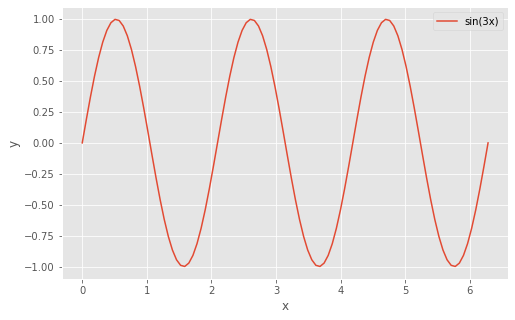

In [8]:
fig, ax = plt.subplots(1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x,np.sin(3*x),label='sin(3x)')
ax.legend()

## Examples
### Partial sums of Fourier Series
From John Stewart, Python for Scientists, (2017)\
$f(x)=\frac{4}{\pi} \sum \frac{sin(nx)}{n}$

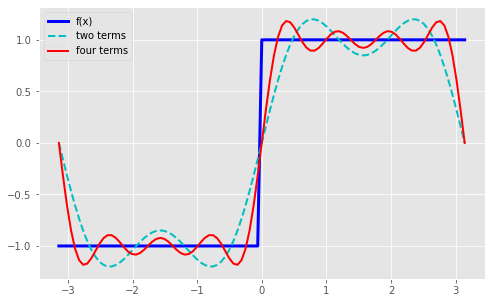

In [9]:

x=np.linspace(-np.pi,np.pi,101)
f=np.ones_like(x)
f[x<0]=-1
y1=(4/np.pi)*(np.sin(x)+np.sin(3*x)/3.)
y2=y1+(4/np.pi)*(np.sin(5*x)/5.+np.sin(7*x)/7.0)
fig, ax = plt.subplots(1)
ax.plot(x,f,'-b',lw=3,label='f(x)')
ax.plot(x,y1,'c--',lw=2,label='two terms')
ax.plot(x,y2,'r-',lw=2,label='four terms')
ax.legend()

### Scatter plots


axes have lots convenience methods for lots of different types of plots. One of these is the scatter plot. Take a look at the help for `plt.scatter`

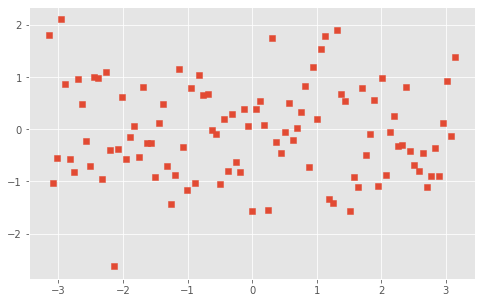

In [10]:
# Create a scatter plot of x vs np.random.randn(len(x) with `marker='s'`)
fig, ax = plt.subplots(1)
ax.scatter(x, np.random.randn(len(x)), marker='s');

One interesting variation is to use colors and marker size to encode more information. You can control the size of the markers with the `size=` keyword. In the example below `alpha` sets a transparency and c sets colors. Take a look at the help to understand the types of these arguments

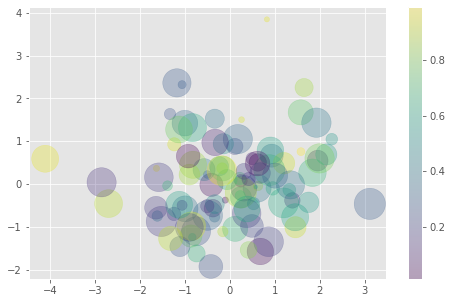

In [11]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

fig, ax = plt.subplots(1)
s = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
fig.colorbar(s, ax = ax);

### Error bar Plots

Error bars are often required in geoscience. Matplotlib has a special plotting utility to make showing them easy

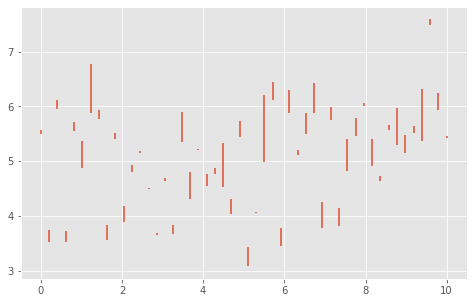

In [12]:
x = np.linspace(0, 10, 50)
y = 5 + np.random.randn(50)
yerr = 0.2 * np.random.randn(50)

fig, ax = plt.subplots(1)
ax.errorbar(x, y, yerr=yerr, linestyle='None');

The default size for the error bar caps is too small, let's tweak this

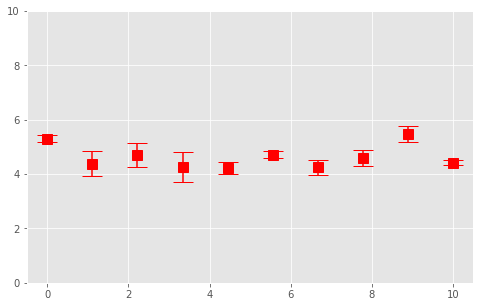

In [13]:
x = np.linspace(0, 10, 10)
y = 5 + 0.5 * np.random.randn(10)
yerr = 0.5 * np.random.randn(10)

fig, ax = plt.subplots(1)

# Set the ylim to (0,10) and change the capsize, markersize, ecolor etc.
ax.set_ylim(0, 10)
ax.errorbar(
    x, 
    y, 
    yerr, 
    linestyle='None', 
    color='red', 
    capsize=10, 
    markersize=10, 
    marker='s'
);

### Bar plots/Histograms

Histograms are useful for taking a quick look at how data is distributed. The default call will auto set a range and put things into one of 10 bins across that range. The histogram function not only plots your data but it will return 3 objects

  * **n**: The number of items in each bin, as an `ndarray`
  * **bins**: The edge locations of the bins, as an `ndarray`
  * **patches**: A list of patches used by matplotlib to render the bins

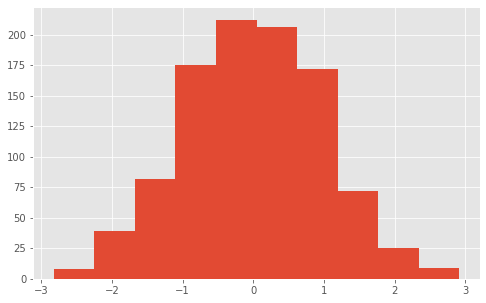

In [14]:
# Show a histogram of `np.random.randn(1000)`

fig, ax = plt.subplots()
ax.hist(np.random.randn(1000));

This is really handy for data exploration, and you can tweak the bin sizes etc. as needed. In addition to the plots, you also get back a tuple with the bin counts and locations 

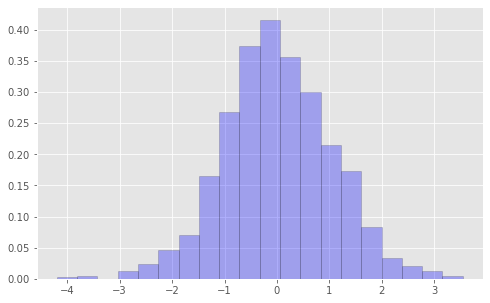

In [15]:
# Same plot, but with
#  * 20 bins
#  * alpha of 0.6
#  * Green bars
#  * Black lines around the bars
fig, ax = plt.subplots()
(n, bins, _) = ax.hist(
    np.random.randn(1000),
    bins=20,
    density=True,
    alpha=0.3,
    color='b',
    edgecolor='k'
)

Bar plots are similar to histograms, but where the columns in a histogram correspond to a continuous categorical variable, the columns in a bar chart can correspond to groups defined by non-continuous categorical. e.g. Age is continuous so you could do a histogram by age, but the faculties someone might belong to are discrete so a bar chart would be best.

In the example below we've jumped straight into adding a bunch of keywords. We've manually created a stacked bar plot by setting the `bottom=` keyword on the second call so that the orange bars start at the top of the corresponding blue bar.

<BarContainer object of 5 artists>

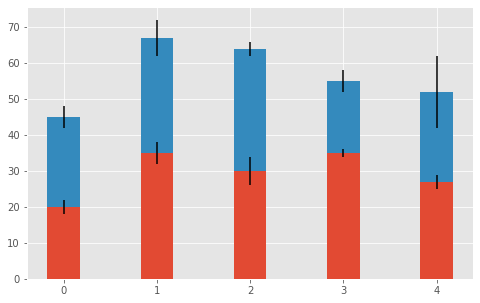

In [19]:
N = 5
mMeans = (20, 35, 30, 35, 27)
wMeans = (25, 32, 34, 20, 25)
mStd = (2, 3, 4, 1, 2)
wStd = (3, 5, 2, 3, 10)

fig, ax = plt.subplots(1)
ax.bar(np.arange(N), mMeans, width=0.35, yerr = mStd)
ax.bar(np.arange(N), wMeans, bottom=mMeans, width=0.35, yerr = wStd)

There's a `barh` method for doing the same thing horizontally.

In `2D` there is still a useful notion of the histogram

In [21]:
#np.random.multivariate_normal?

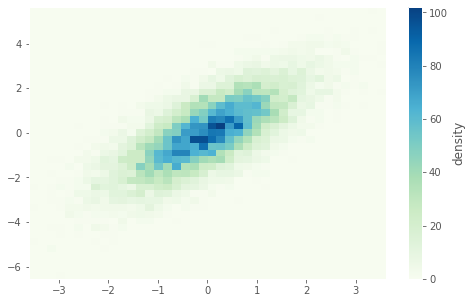

In [26]:
fig, ax = plt.subplots(1)

x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 2]], 10000).T
(_, _, _, h2) = ax.hist2d(x, y, bins=40, cmap='GnBu')
cb = fig.colorbar(h2, ax=ax)
cb.set_label('density')

### Polar Plots

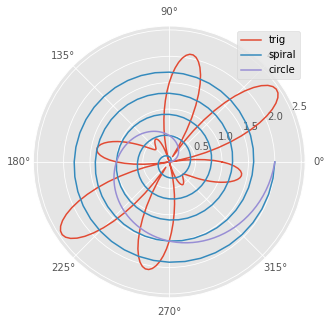

In [27]:
theta=np.linspace(0,2*np.pi,201)
r1=np.abs(np.cos(5.0*theta)-1.5*np.sin(3.0*theta))
r2=theta/np.pi
r3=2.25*np.ones_like(theta)
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')
ax.plot(theta, r1, label='trig')
ax.plot(5*theta, r2, label='spiral')
ax.plot(theta, r2, label='circle')
ax.legend(loc='best');

### Contour plots

Countour plots come up very often in machine learning.


In [28]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
    
x = np.linspace(0, 5, 50)
y = np.linspace(0, 4, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

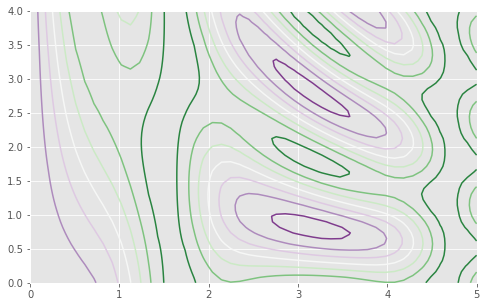

In [29]:
fig, ax = plt.subplots(1)
ax.contour(X, Y, Z, cmap='PRGn')

There is a `contourf` method which will fill in the spaces between the contours.

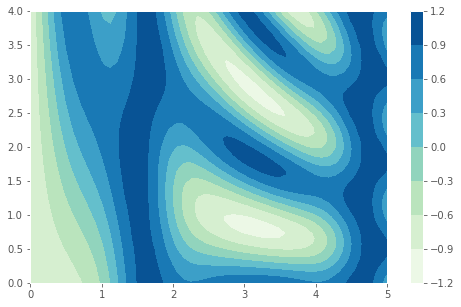

In [30]:
fig, ax = plt.subplots(1)
cf = ax.contourf(X, Y, Z, cmap='GnBu')
fig.colorbar(cf, ax = ax);

## Subplots

For publications you might want to have multiple plots next to each other, this is where `plt.subplots()` becomes more than boilerplate...

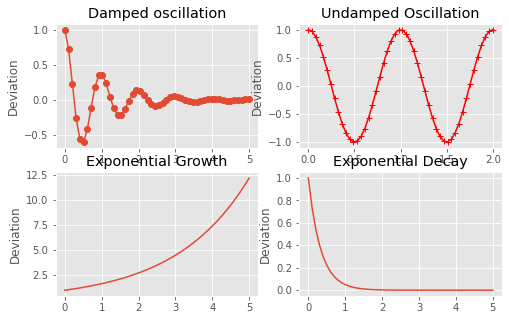

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2)

x1 = np.linspace(0., 5.)
x2 = np.linspace(0., 2.)

y1 = np.cos(2*np.pi * x1) * np.exp(-x1)
y2 = np.cos(2*np.pi * x2)

ax[0,0].plot(x1, y1, 'o-')
ax[0,0].set_title('Damped oscillation')
ax[0,0].set_ylabel('Deviation')

ax[0,1].plot(x2, y2, '+-', color='red')
ax[0,1].set_title('Undamped Oscillation')
ax[0,1].set_ylabel('Deviation')

ax[1,0].plot(x1, np.exp(0.5*x1))
ax[1,0].set_title('Exponential Growth')
ax[1,0].set_ylabel('Deviation')

ax[1,1].plot(x1, np.exp(-3*x1))
ax[1,1].set_title('Exponential Decay')
ax[1,1].set_ylabel('Deviation');


If you need some inspiration, you can find some useful examples in [this gallery](https://matplotlib.org/3.1.0/gallery/index.html).

There is also a whole language of annotations and patches for marking up your plots to highligh features etc.

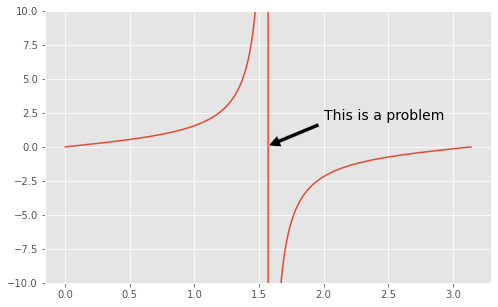

In [32]:
x = np.linspace(0, np.pi, 1000)
y = np.tan(x)

fig, ax = plt.subplots(1)
ax.plot(x, y)
ax.set_ylim(-10,10)

_ = ax.annotate("This is a problem", 
            xy=(1.55,0), # Coordinate locating the arrow 
            xytext=(2,2), # Location of the text
            arrowprops={'facecolor': 'k', 'shrink': 0.05},
            size=14
           )

## Style

Matplotlib has a distinctive style, thankfully they let you specify stylesheets to change things up a bit. Take a look at `plt.style.available` and try out some alternatives. You can try them out with the context system (`with` keyword) - this tidies up the context when you are done and avoids restyling your work above.

In [33]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

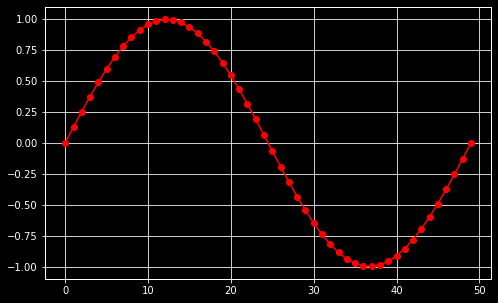

In [34]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

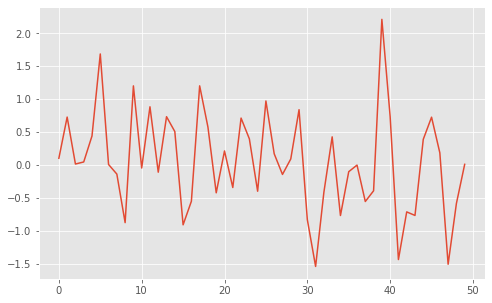

In [35]:
from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

fix, ax = plt.subplots()
ax.plot(data);

## 3D visualization
Examples from 
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

There are some limited tools for 3D visualization included with Matplotlib. 
We need the module mplot3d

In [36]:
from mpl_toolkits import mplot3d

A 3D axis can be created by using projection='3d'

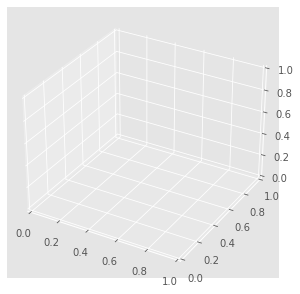

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')

with 3D axis, we can use ax.plot3D for lines and ax.scatter3D for points.

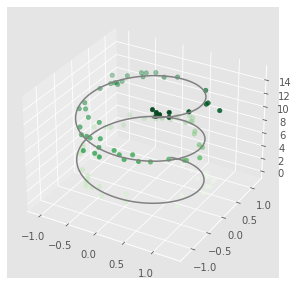

In [38]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

or we can plot surfaces with contor3D

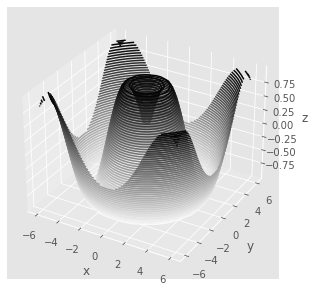

In [39]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

or with plot_surface

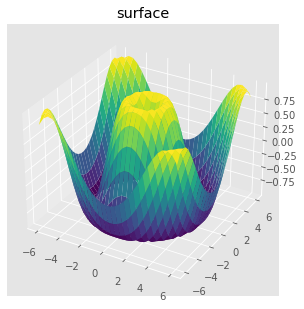

In [40]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');